In [1]:
import os
import glob

import numpy as np
import tensorflow as tf

from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\subrahm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\subrahm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\subrahm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\subrahm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [2]:
import multiprocessing

multiprocessing.cpu_count()

8

In [1]:
# To Unzip an zipped file
import zipfile
with zipfile.ZipFile('../data/data.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/')

In [3]:
DATA_PATH = '../data/test_cnn_data'

In [4]:
num_images = len(list(glob.glob(os.path.join(DATA_PATH, '*/*/*.png'))))
"total images: {}".format(num_images)

'total images: 138'

In [5]:
train_dir = os.path.join(DATA_PATH,'train')
val_dir = os.path.join(DATA_PATH,'val')

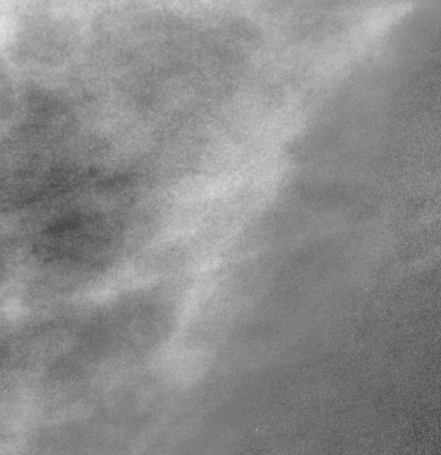

In [6]:
Image.open(list(glob.glob(train_dir+'/*/*.png'))[0])

In [7]:
CLASSES = np.array([item for item in os.listdir(train_dir)])
"classes: {}".format(CLASSES)

"classes: ['normal_tissue' 'tumor']"

In [8]:
print('Train:')
for cls in CLASSES:
    print(f"number of images belonging to {cls} class: {len(os.listdir(os.path.join(train_dir,cls)))}")
    
print('\nValidation:')
for cls in CLASSES:
    print(f"number of images belonging to {cls} class: {len(os.listdir(os.path.join(val_dir,cls)))}")

Train:
number of images belonging to normal_tissue class: 63
number of images belonging to tumor class: 63

Validation:
number of images belonging to normal_tissue class: 6
number of images belonging to tumor class: 6


In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

Found 126 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [27]:
train_generator.next()[0].shape

(10, 300, 300, 3)

In [13]:
num_classes = 2

# model = Sequential([
#     layers.Conv2D(16, 3, padding='same', activation='relu'),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.Conv2D(128, 3, padding='same', activation='relu'),
#     layers.Conv2D(256, 3, padding='same', activation='relu'),
#     layers.Conv2D(512, 3, padding='same', activation='relu'),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

In [14]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [ ]:
# epochs=10
# history = model.fit(
#   train_generator,
#   validation_data=validation_generator,
#   epochs=epochs
# )

In [ ]:
IMG_SHAPE = (300,300) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')